In [9]:
%load_ext autoreload
%autoreload
import argparse
import copy
import json
import os
import sys

sys.path.append("../")
sys.path.append("../src")

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import pandas as pd
from IPython import embed
from matplotlib import pyplot as plt
from torch.autograd import Variable


%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
%autoreload
import src
from src.i3dense import I3DenseNet
from src.i3res import I3ResNet
from src.evaluator import Evaluator
from src.mit_data import MITDataset
from src.train import train, validation_loss
from src.video_handler import VideoViewer
from src.label_handler import LabelHandler
from src.runner import Runner
import experiment.resnet2d_top20 as resnet2d
import experiment.resnet3d_top20 as resnet3d

## some setup

In [21]:
run_3d = Runner("../experiment/resnet3d_top20/run_0001")
run_2d_low = Runner("../experiment/resnet2d_top20/low_lr_run2/")
run_2d_normal = Runner("../experiment/resnet2d_top20/normal_lr_run2/")
mlb = resnet2d.mlb

## Visualize training loss

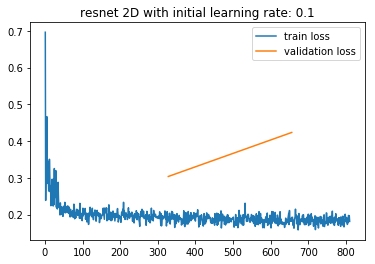

In [3]:
resnet2d_loss = pd.read_csv("../experiment/resnet2d_top20/run_0001/train_log.csv")
train_loss = resnet2d_loss[resnet2d_loss["split"] == "train"]
val_loss = resnet2d_loss[resnet2d_loss["split"] == "val"]
plt.plot(train_loss["step"].values, train_loss["loss"].values, label="train loss")
plt.plot(val_loss["step"].values, val_loss["loss"].values, label="validation loss")
plt.legend()
plt.title("resnet 2D with initial learning rate: 0.1")

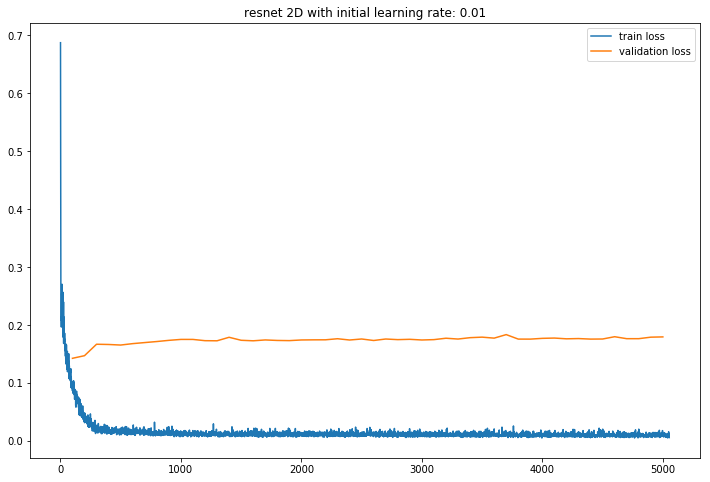

In [15]:
resnet2d_lowlr_loss = pd.read_csv(run_2d_low.log_file)
train_loss = resnet2d_lowlr_loss[resnet2d_lowlr_loss["split"] == "train"]
val_loss = resnet2d_lowlr_loss[resnet2d_lowlr_loss["split"] == "val"]
plt.figure(figsize=(12,8))
plt.plot(train_loss["step"].values, train_loss["loss"].values, label="train loss")
plt.plot(val_loss["step"].values, val_loss["loss"].values, label="validation loss")
plt.title("resnet 2D with initial learning rate: 0.01")
plt.legend()
plt.savefig(run_2d_low.figure_file("learning_curve.pdf"))

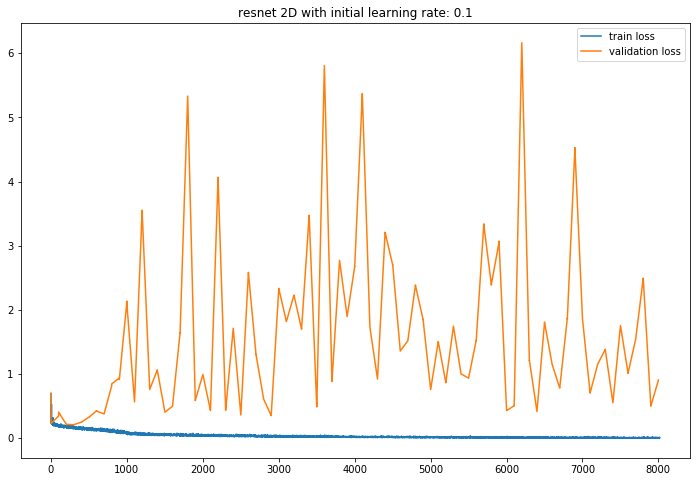

In [17]:
resnet2d_loss = pd.read_csv(run_2d_normal.log_file)
train_loss = resnet2d_loss[resnet2d_loss["split"] == "train"]
val_loss = resnet2d_loss[resnet2d_loss["split"] == "val"]
plt.figure(figsize=(12,8))
plt.plot(train_loss["step"].values, train_loss["loss"].values, label="train loss")
plt.plot(val_loss["step"].values, val_loss["loss"].values, label="validation loss")
plt.title("resnet 2D with initial learning rate: 0.1")
plt.legend()
plt.savefig(run_2d_normal.figure_file("learning_curve.pdf"))

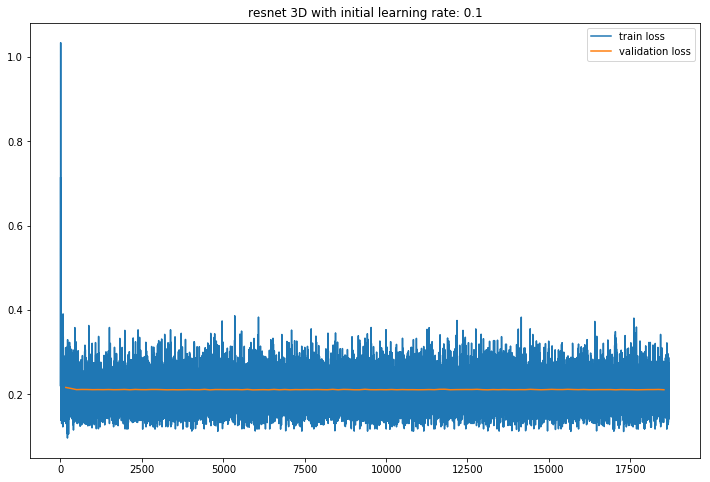

In [18]:
resnet_3d_loss = pd.read_csv("../experiment/resnet3d_top20/run_0001/1212_log.csv")
train_loss = resnet_3d_loss[resnet_3d_loss["split"] == "train"]
val_loss = resnet_3d_loss[resnet_3d_loss["split"] == "val"]
plt.figure(figsize=(12,8))
plt.plot(train_loss["step"].values, train_loss["loss"].values, label="train loss")
plt.plot(val_loss["step"].values, val_loss["loss"].values, label="validation loss")
plt.legend()
plt.title("resnet 3D with initial learning rate: 0.1")
plt.savefig(run_3d.figure_file("learning_curve.pdf"))

## Evaluate validation set and compute some statistics

In [27]:
cuda = torch.device("cuda:1")
mlb = resnet2d.mlb
model2d = copy.deepcopy(resnet2d.model)
val_dataloader_2d = resnet2d.val_dataloader
model2d.to(cuda0)
original_model = copy.deepcopy(resnet2d.model)
model2d.load_state_dict(torch.load("../experiment/resnet2d_top20/low_lr_run2/weights/005000.pt", map_location=cuda))

In [8]:
del model2d

NameError: name 'model2d' is not defined

In [17]:
cuda = torch.device("cuda:1")
mlb = resnet3d.mlb
model3d = copy.deepcopy(resnet3d.model)
val_dataloader_3d = resnet3d.val_dataloader
model3d.to(cuda)
model3d.load_state_dict(torch.load("../experiment/resnet3d_top20/run_0001/weights/normalized_004990.pt", map_location=cuda))

In [28]:
eval_2d_low_lr = Evaluator(mlb)
eval_2d_low_lr.run(model2d, val_dataloader_2d)
eval_2d_low_lr.save_result("../experiment/resnet2d_top20/low_lr_run2/val_eval.pkl")

94443520
inferencing number    0
94443520
inferencing number    1
94443520
inferencing number    2
94443520
inferencing number    3
94443520
inferencing number    4
94443520
inferencing number    5
94443520
inferencing number    6
94443520
inferencing number    7
94443520
inferencing number    8
94443520
inferencing number    9
94443520
inferencing number   10
94443520
inferencing number   11
94443520
inferencing number   12
94443520
inferencing number   13
94443520
inferencing number   14
94443520
inferencing number   15
94443520
inferencing number   16
94443520
inferencing number   17
94443520
inferencing number   18
94443520
inferencing number   19
94443520
inferencing number   20
94443520
inferencing number   21
94443520
inferencing number   22
94443520
inferencing number   23
94443520
inferencing number   24
94443520
inferencing number   25
94443520
inferencing number   26
94443520
inferencing number   27
94443520
inferencing number   28
94443520
inferencing number   29
94443520
i

94443520
inferencing number  249
94443520
inferencing number  250
94443520
inferencing number  251
94443520
inferencing number  252
94443520
inferencing number  253
94443520
inferencing number  254
94443520
inferencing number  255
94443520
inferencing number  256
94443520
inferencing number  257
94443520
inferencing number  258
94443520
inferencing number  259
94443520
inferencing number  260
94443520
inferencing number  261
94443520
inferencing number  262
94443520
inferencing number  263
94443520
inferencing number  264
94443520
inferencing number  265
94443520
inferencing number  266
94443520
inferencing number  267
94443520
inferencing number  268
94443520
inferencing number  269
94443520
inferencing number  270
94443520
inferencing number  271
94443520
inferencing number  272
94443520
inferencing number  273
94443520
inferencing number  274
94443520
inferencing number  275
94443520
inferencing number  276
94443520
inferencing number  277
94443520
inferencing number  278
94443520
i

94443520
inferencing number  498
94443520
inferencing number  499
94443520
inferencing number  500
94443520
inferencing number  501
94443520
inferencing number  502
94443520
inferencing number  503
94443520
inferencing number  504
94443520
inferencing number  505
94443520
inferencing number  506
94443520
inferencing number  507
94443520
inferencing number  508
94443520
inferencing number  509
94443520
inferencing number  510
94443520
inferencing number  511
94443520
inferencing number  512
94443520
inferencing number  513
94443520
inferencing number  514
94443520
inferencing number  515
94443520
inferencing number  516
94443520
inferencing number  517
94443520
inferencing number  518
94443520
inferencing number  519
94443520
inferencing number  520
94443520
inferencing number  521
94443520
inferencing number  522
94443520
inferencing number  523
94443520
inferencing number  524
94443520
inferencing number  525
94443520
inferencing number  526
94443520
inferencing number  527
94443520
i

In [22]:
eval_2d_low_lr = Evaluator(mlb)
eval_2d_low_lr.load_result("../experiment/resnet2d_top20/low_lr_run2/val_eval.pkl")
eval_2d_low_lr.stats_setup()
auc_2d = eval_2d_low_lr.auc()

In [24]:
eval_3d = Evaluator(mlb)
eval_3d.load_result("../experiment/resnet3d_top20/run_0001/val_result.pkl")

In [25]:
eval_3d.stats_setup()
auc_3d = eval_3d.auc()
auc_2d = eval_2d_low_lr.auc()

In [26]:
lh = LabelHandler(resnet3d.INDEX_FILE)
lh.expand_index()
label_count = lh.label_count()

In [27]:
barplot_2d_unsorted = zip(mlb.classes_,auc_2d)
barplot_2d = sorted(barplot_2d_unsorted,key= lambda data:label_count[data[0]],reverse=True)
barplot_3d_unsorted = zip(mlb.classes_,auc_3d)
barplot_3d = sorted(barplot_3d_unsorted,key= lambda data:label_count[data[0]],reverse=True)

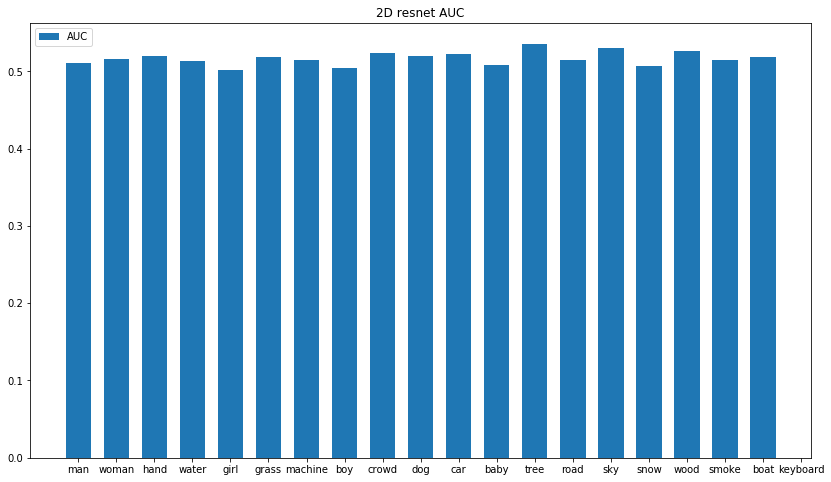

In [28]:
x = np.arange(len(barplot_2d)) * 1.2
labels = list(map(lambda d:d[0], barplot_2d))
auc = np.array(list(map(lambda d:d[1], barplot_2d))).astype(np.float)
plt.figure(figsize=(14,8))
plt.bar(x, auc, label="AUC")
plt.xticks(x,labels)
plt.legend()
plt.title("2D resnet AUC")
plt.savefig(run_2d_low.figure_file("auc.pdf"))

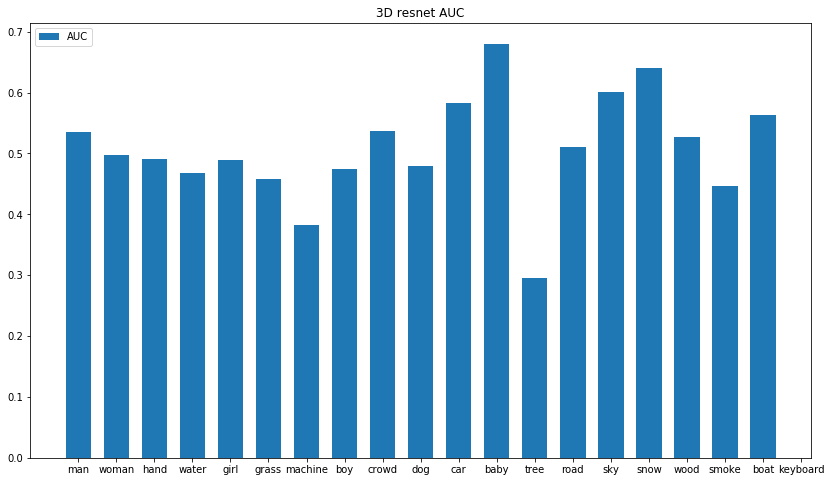

In [30]:
x = np.arange(len(barplot_3d)) * 1.2
labels = list(map(lambda d:d[0], barplot_3d))
auc = np.array(list(map(lambda d:d[1], barplot_3d))).astype(np.float)
plt.figure(figsize=(14,8))
plt.bar(x, auc, label="AUC")
plt.xticks(x,labels)
plt.legend()
plt.title("3D resnet AUC")
plt.savefig(run_3d.figure_file("auc.pdf"))